<a href="https://colab.research.google.com/github/ArezooAalipanah/machine_learning3/blob/main/hml_ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10! : Introduction to Artificial Neural Networks with Keras 🧠

## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

In [2]:
y_pred

array([ True, False])

##The Multilayer Perceptron and Backpropagation


In [3]:
"""
The following code:
1. fetching and splitting the dataset
2.creates a pipeline to standardize the input features before sending them to
the MLPRegressor.  very important : gradient descent does not converge very well
 when the features have very different scales.
3. code trains the model and evaluates its validation error.
model uses the ReLU activation function in the hidden layers,
uses a variant of gradient descent called Adam  to minimize the MSE
a little bit of ℓ2 regularization (you can control via the alpha hyperparameter):
"""
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes = [50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared = False)

In [4]:
rmse

0.5053326657968679

## Implementing MLPs with Keras

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[: -5000], y_train_full[: -5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

In [8]:
#scale the pixel intensities down to the 0–1 range by dividing them
#by 255.0 (this also converts them to floats):

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [9]:
class_names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Ankle boot'

In [11]:
import matplotlib.pyplot as plt


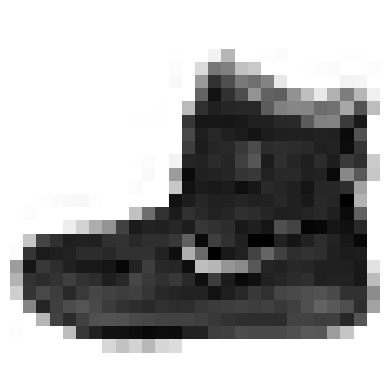

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### Creating the model using the sequential API

In [13]:
# a calssification MLP with 2 hidden layers
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [14]:
"""it’s often more convenient to pass a list of layers
when creating the Sequential model. You can also drop the Input
layer and instead specify the input_shape in the first layer:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


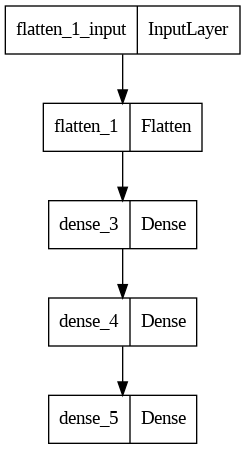

In [16]:
tf.keras.utils.plot_model(model)

In [17]:
# get a model's layers
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1

In [19]:
hidden1.name

'dense_3'

In [21]:
model.get_layer("dense_3")


In [23]:
model.get_layer("dense_3") is hidden1

True

In [24]:
"""All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both connection weights
and the bias terms"""

weights, biases = hidden1.get_weights()


In [25]:
weights

array([[ 0.0257628 ,  0.01532027,  0.05281287, ...,  0.02623758,
         0.04094268,  0.01224305],
       [-0.01744981,  0.01388251,  0.02320419, ...,  0.05100323,
        -0.01030041, -0.00236534],
       [ 0.02792002, -0.0572546 , -0.04008379, ...,  0.03668186,
         0.03639075, -0.01390861],
       ...,
       [-0.00166092,  0.03833301, -0.05352807, ..., -0.01016443,
        -0.03775215, -0.04203286],
       [-0.0044847 ,  0.04147516,  0.05156815, ...,  0.05379893,
        -0.00806218, -0.06815371],
       [ 0.02225082, -0.03339488,  0.02030695, ..., -0.05657448,
         0.07299379,  0.02239305]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

In [31]:
# compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

In [32]:
#Training and evaluating the model

history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7191 - accuracy: 0.7615 - val_loss: 0.5090 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4930 - accuracy: 0.8280 - val_loss: 0.4729 - val_accuracy: 0.8270
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4457 - accuracy: 0.8434 - val_loss: 0.4346 - val_accuracy: 0.8446
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4203 - accuracy: 0.8521 - val_loss: 0.4020 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3986 - accuracy: 0.8596 - val_loss: 0.3943 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3821 - accuracy: 0.8646 - val_loss: 0.3955 - val_accuracy: 0.8580
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3689 - accuracy: 0.8686 - val_loss: 0.3799 - val_accuracy

In [33]:
history.history

{'loss': [0.7191326022148132,
  0.49296438694000244,
  0.4457269310951233,
  0.4202963411808014,
  0.3986358046531677,
  0.38210543990135193,
  0.36888429522514343,
  0.3569847047328949,
  0.3454827070236206,
  0.33502718806266785,
  0.3264476954936981,
  0.31775549054145813,
  0.31024786829948425,
  0.30303749442100525,
  0.2966564893722534,
  0.28892919421195984,
  0.28392675518989563,
  0.2775963842868805,
  0.272126168012619,
  0.2671501338481903,
  0.2611926794052124,
  0.2564257085323334,
  0.2515629231929779,
  0.24615119397640228,
  0.24193313717842102,
  0.23857848346233368,
  0.23323242366313934,
  0.22985361516475677,
  0.22567424178123474,
  0.2220676988363266],
 'accuracy': [0.7614727020263672,
  0.8280181884765625,
  0.8433818221092224,
  0.8521272540092468,
  0.8596363663673401,
  0.8645636439323425,
  0.8685636520385742,
  0.8733272552490234,
  0.8776909112930298,
  0.8799454569816589,
  0.8840727210044861,
  0.8858363628387451,
  0.8899090886116028,
  0.890818178653717

<Axes: xlabel='Epoch'>

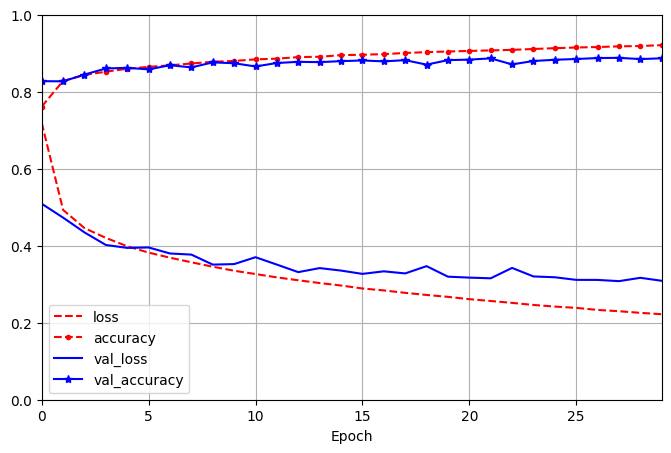

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim = [0, 29], ylim = [0, 1], grid = True, xlabel="Epoch",
    style = ["r--", "r--.","b-", "b-*"])

In [35]:
history_2 = model.fit(X_train, y_train, epochs = 20,
                    validation_data = (X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2171 - accuracy: 0.9220 - val_loss: 0.3268 - val_accuracy: 0.8842
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2146 - accuracy: 0.9223 - val_loss: 0.3198 - val_accuracy: 0.8822
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2098 - accuracy: 0.9246 - val_loss: 0.3269 - val_accuracy: 0.8804
Epoch 4/20
1719/1719 [==============================] - 9s 6ms/step - loss: 0.2079 - accuracy: 0.9255 - val_loss: 0.3045 - val_accuracy: 0.8882
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2040 - accuracy: 0.9264 - val_loss: 0.3060 - val_accuracy: 0.8896
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1996 - accuracy: 0.9285 - val_loss: 0.3261 - val_accuracy: 0.8864
Epoch 7/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1972 - accuracy: 0.9294 - val_loss: 0.3182 - val_accura

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3385 - accuracy: 0.8894


[0.33848559856414795, 0.8894000053405762]

In [38]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 173ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)